##Imports

In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
file_path='data/dataset.csv'
df = pd.read_csv(file_path)
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in df.columns:

    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Exploring the data

In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


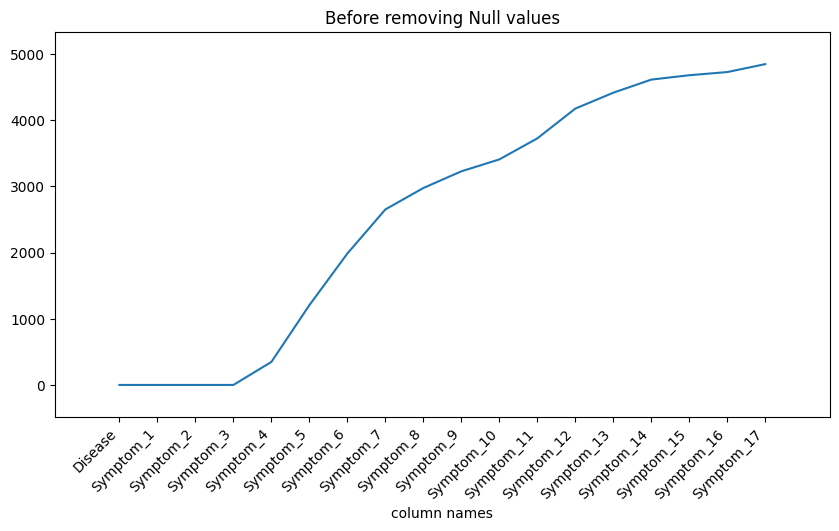

In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()


In [ ]:
#printing the missing values
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of missing values:
	Disease: 0
	Symptom_1: 0
	Symptom_2: 0
	Symptom_3: 0
	Symptom_4: 348
	Symptom_5: 1206
	Symptom_6: 1986
	Symptom_7: 2652
	Symptom_8: 2976
	Symptom_9: 3228
	Symptom_10: 3408
	Symptom_11: 3726
	Symptom_12: 4176
	Symptom_13: 4416
	Symptom_14: 4614
	Symptom_15: 4680
	Symptom_16: 4728
	Symptom_17: 4848


In [ ]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = pd.read_csv('data/Symptom-severity.csv')
x=df1['Symptom']
x

0                   itching
1                 skin_rash
2      nodal_skin_eruptions
3       continuous_sneezing
4                 shivering
               ...         
128      inflammatory_nails
129                 blister
130    red_sore_around_nose
131       yellow_crust_ooze
132               prognosis
Name: Symptom, Length: 133, dtype: object

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,mood swings,weight loss,5,3,6,fast heart rate,excessive hunger,muscle weakness,2,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,yellowish skin,5,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Extract mapped symptoms from severity dataset
mapped_symptoms = set(df1['Symptom'])

# Identify unmapped symptoms in the disease dataset
unmapped_symptoms = [col for col in df.columns if col.startswith('Symptom') and col not in mapped_symptoms]

print(unmapped_symptoms)
# Find the last mapped code
last_mapped_code = max(df1['code']) if 'code' in df1.columns else 0

# Create label encoding mapping for unmapped symptoms starting from the last mapped code + 1
label_mapping = {}
label_code = last_mapped_code + 1
for symptom in unmapped_symptoms:
    label_mapping[symptom] = label_code
    label_code += 1

# Encode unmapped symptoms in the disease dataset
encoder = LabelEncoder()
for Symptom, code in label_mapping.items():
    df[Symptom] = encoder.fit_transform(df[Symptom].astype(str)) + code



['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [ ]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,19,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,Acne,19,21,3,5,5,6,7,8,9,10,11,12,13,14,15,16,17
2,Hyperthyroidism,3,15,41,8,7,10,18,18,22,11,17,12,13,14,15,16,17
3,AIDS,13,20,20,21,5,6,7,8,9,10,11,12,13,14,15,16,17
4,Chronic cholestasis,1,5,42,8,25,11,27,8,9,10,11,12,13,14,15,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,Psoriasis,19,12,33,35,30,20,7,8,9,10,11,12,13,14,15,16,17
4916,Peptic ulcer diseae,4,5,24,10,21,6,7,8,9,10,11,12,13,14,15,16,17
4917,Dengue,19,3,22,8,8,18,9,11,20,22,19,15,17,17,15,16,17
4918,Fungal infection,1,23,29,18,5,6,7,8,9,10,11,12,13,14,15,16,17


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


In [ ]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


##Model building

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Hepatitis B' 'Hepatitis E' '(vertigo) Paroymsal  Positional Vertigo'
 'Cervical spondylosis' 'Dengue' 'Typhoid' 'Common Cold' 'hepatitis A'
 'Varicose veins' 'Typhoid' 'Paralysis (brain hemorrhage)' 'Dengue'
 'Malaria' 'Dengue' 'Jaundice' 'Impetigo'
 '(vertigo) Paroymsal  Positional Vertigo' 'Psoriasis'
 'Dimorphic hemmorhoids(piles)' 'Peptic ulcer diseae'
 'Dimorphic hemmorhoids(piles)' 'Allergy' 'Allergy'
 'Urinary tract infection' 'Hypoglycemia' 'AIDS' 'Acne' 'Hypothyroidism'
 'Arthritis' 'Hypoglycemia' 'Acne' 'Peptic ulcer diseae'
 'Fungal infection' 'Varicose veins' 'Urinary tract infection' 'AIDS'
 'AIDS' 'Tuberculosis' 'hepatitis A' 'Typhoid' 'Hyperthyroidism' 'Dengue'
 '(vertigo) Paroymsal  Positional Vertigo' 'Pneumonia' 'Diabetes'
 'Urinary tract infection' 'Typhoid' 'Allergy' 'Peptic ulcer diseae'
 'Paralysis (brain hemorrhage)' 'Pneumonia' 'Malaria' 'Hypoglycemia'
 'Impetigo' 'Osteoarthristis' 'Impetigo' 'Hypertension' 'Common Cold'
 'T

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


# Create and fit Support Vector Machine Classifier
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

# Create and fit Neural Network Classifier
nn_classifier = MLPClassifier()
nn_classifier.fit(x_train, y_train)

# Create and fit  Naive bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)



GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict using each model on the validation set
svm_val_pred = svm_classifier.predict(x_test)
nn_val_pred = nn_classifier.predict(x_test)
nb_val_pred = nb_classifier.predict(x_test)

# Calculate accuracy for each model

svm_acc = accuracy_score(y_test, svm_val_pred)
nn_acc = accuracy_score(y_test, nn_val_pred)
nb_acc = accuracy_score(y_test, nb_val_pred)


print("Support Vector Machine Classifier Accuracy:", svm_acc)
print("Neural Network Classifier Accuracy:", nn_acc)
print("gaussian naive bayes Classifier Accuracy:", nb_acc)




Support Vector Machine Classifier Accuracy: 0.959349593495935
Neural Network Classifier Accuracy: 0.9986449864498645
gaussian naive bayes Classifier Accuracy: 0.9051490514905149


In [ ]:
desc = pd.read_csv("data/symptom_Description.csv")

In [ ]:
prec = pd.read_csv("data/symptom_precaution.csv")

In [ ]:
y=df['Disease'].unique()
y

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [ ]:
def predd(x,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    #print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
    psy = [psymptoms]
    pred2 = x.predict(psy)
    disp= desc[desc['Disease']==pred2[0]]
    disp = disp.values[0][1]
    recomnd = prec[prec['Disease']==pred2[0]]
    c=np.where(prec['Disease']==pred2[0])[0][0]
    precuation_list=[]
    for i in range(1,len(prec.iloc[c])):
          precuation_list.append(prec.iloc[c,i])
    print("The Disease Name: ",pred2[0])
    print("The Disease Discription: ",disp)
    print("Recommended Things to do at home: ")
    for i in precuation_list:
        print(i)

##Testing

In [ ]:
# save
joblib.dump(svm_classifier, "svc.joblib")

['svc.joblib']

In [ ]:
# load, no need to initialize the loaded_rf
loaded_svc = joblib.load("svc.joblib")

In [ ]:
sympList=df1["Symptom"].to_list()
predd(loaded_svc,sympList[0],sympList[1],sympList[2],sympList[8],0,0,1,0,0,0,0,0,0,0,0,0,0)

The Disease Name:  Allergy
The Disease Discription:  An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.
Recommended Things to do at home: 
apply calamine
cover area with bandage
nan
use ice to compress itching
